In [175]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


In [176]:
data = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

In [177]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [178]:
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [179]:
data.shape

(2500, 10)

In [180]:
data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [181]:
data.drop(columns = 'User ID', inplace = True)

In [182]:
data

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [183]:
data.rename( columns = {'Subscription Type': 'subscription_type', 'Monthly Revenue': 'monthly_revenue' , 'Join Date': 'join_date',
           'Last Payment Date': 'last_payment_date', 'Country': 'country', 'Age': 'age', 'Gender': 'gender', 'Device': 'device',
           'Plan Duration': 'plan_duration'}, inplace = True )
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [184]:
data.subscription_type.unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [185]:
data.country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [186]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [187]:
data.device.unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [188]:
data.plan_duration.unique()

array(['1 Month'], dtype=object)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2500 non-null   object
 1   monthly_revenue    2500 non-null   int64 
 2   join_date          2500 non-null   object
 3   last_payment_date  2500 non-null   object
 4   country            2500 non-null   object
 5   age                2500 non-null   int64 
 6   gender             2500 non-null   object
 7   device             2500 non-null   object
 8   plan_duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB


In [190]:
data.drop(columns = 'plan_duration', inplace = True)

In [191]:
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone
...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet


In [192]:
data.monthly_revenue.unique()

array([10, 15, 12, 13, 11, 14])

In [193]:
data.age.unique()

array([28, 35, 42, 51, 33, 29, 46, 39, 37, 44, 31, 45, 48, 27, 38, 36, 30,
       43, 32, 41, 26, 34, 49, 40, 47, 50])

In [194]:
data['gender'] = data.gender.apply(lambda x: 'm' if x=='Male' else 'f')
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device
0,Basic,10,15-01-22,10-06-23,United States,28,m,Smartphone
1,Premium,15,05-09-21,22-06-23,Canada,35,f,Tablet
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,m,Smart TV
3,Standard,12,10-07-22,26-06-23,Australia,51,f,Laptop
4,Basic,10,01-05-23,28-06-23,Germany,33,m,Smartphone
...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,f,Smart TV
2496,Basic,15,04-08-22,14-07-23,Spain,33,f,Smart TV
2497,Standard,12,09-08-22,15-07-23,United States,38,m,Laptop
2498,Standard,13,12-08-22,12-07-23,Canada,48,f,Tablet


In [195]:
data['country'] = data['country'].apply(lambda x: 'US' if x == 'United States' else ('UK' if x == 'United Kingdom' else x))
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device
0,Basic,10,15-01-22,10-06-23,US,28,m,Smartphone
1,Premium,15,05-09-21,22-06-23,Canada,35,f,Tablet
2,Standard,12,28-02-23,27-06-23,UK,42,m,Smart TV
3,Standard,12,10-07-22,26-06-23,Australia,51,f,Laptop
4,Basic,10,01-05-23,28-06-23,Germany,33,m,Smartphone
...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,f,Smart TV
2496,Basic,15,04-08-22,14-07-23,Spain,33,f,Smart TV
2497,Standard,12,09-08-22,15-07-23,US,38,m,Laptop
2498,Standard,13,12-08-22,12-07-23,Canada,48,f,Tablet


In [196]:
countries_list = data['country'].unique().tolist()
countries_list

['US',
 'Canada',
 'UK',
 'Australia',
 'Germany',
 'France',
 'Brazil',
 'Mexico',
 'Spain',
 'Italy']

In [197]:
px.bar(data['country'], x = 'country')

In [198]:
px.bar(data['device'], x = 'device')

In [199]:
px.bar(data['subscription_type'], x = 'subscription_type')

In [200]:
px.pie(names = data['gender'].value_counts().index, values = data['gender'].value_counts().values, title='Gender Distribution')

In [201]:
data['last_payment_date'] = pd.to_datetime(data['last_payment_date'], format = '%d-%m-%y')
data['join_date'] = pd.to_datetime(data['join_date'], format = '%d-%m-%y')

In [202]:
data['join_time_days'] = data.apply(lambda row: (row['last_payment_date'] - row['join_date']).days if (row['last_payment_date'] > row['join_date']) else 0, axis=1)

In [203]:
data.head(20)

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,join_time_days
0,Basic,10,2022-01-15,2023-06-10,US,28,m,Smartphone,511
1,Premium,15,2021-09-05,2023-06-22,Canada,35,f,Tablet,655
2,Standard,12,2023-02-28,2023-06-27,UK,42,m,Smart TV,119
3,Standard,12,2022-07-10,2023-06-26,Australia,51,f,Laptop,351
4,Basic,10,2023-05-01,2023-06-28,Germany,33,m,Smartphone,58
5,Premium,15,2022-03-18,2023-06-27,France,29,f,Smart TV,466
6,Standard,12,2021-12-09,2023-06-25,Brazil,46,m,Tablet,563
7,Basic,10,2023-04-02,2023-06-24,Mexico,39,f,Laptop,83
8,Standard,12,2022-10-20,2023-06-23,Spain,37,m,Smartphone,246
9,Premium,15,2023-01-07,2023-06-22,Italy,44,f,Smart TV,166


In [204]:
incorrect_data = data[data['join_time_days'] == 0]
incorrect_data.shape

(0, 9)

In [205]:
data = data[data['join_time_days'] != 0]

In [206]:
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,join_time_days
0,Basic,10,2022-01-15,2023-06-10,US,28,m,Smartphone,511
1,Premium,15,2021-09-05,2023-06-22,Canada,35,f,Tablet,655
2,Standard,12,2023-02-28,2023-06-27,UK,42,m,Smart TV,119
3,Standard,12,2022-07-10,2023-06-26,Australia,51,f,Laptop,351
4,Basic,10,2023-05-01,2023-06-28,Germany,33,m,Smartphone,58
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,2022-07-25,2023-07-12,Spain,28,f,Smart TV,352
2496,Basic,15,2022-08-04,2023-07-14,Spain,33,f,Smart TV,344
2497,Standard,12,2022-08-09,2023-07-15,US,38,m,Laptop,340
2498,Standard,13,2022-08-12,2023-07-12,Canada,48,f,Tablet,334


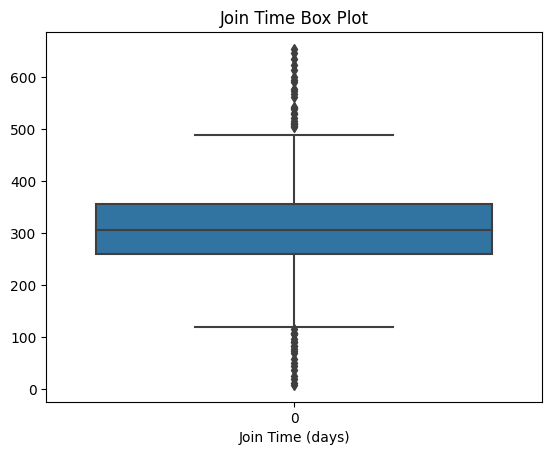

In [207]:
sns.boxplot(data['join_time_days'])
plt.title('Join Time Box Plot')
plt.xlabel('Join Time (days)')
plt.show()

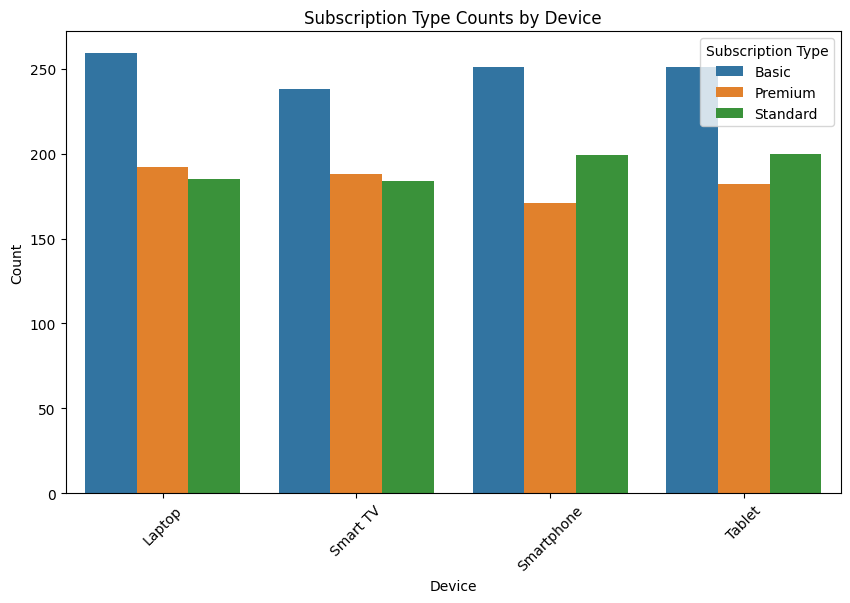

In [208]:
# bivariate visualisation
# relationship between subscription type and device

subscription_counts = data.groupby(['device', 'subscription_type']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=subscription_counts, x='device', y='count', hue='subscription_type')
plt.title('Subscription Type Counts by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()



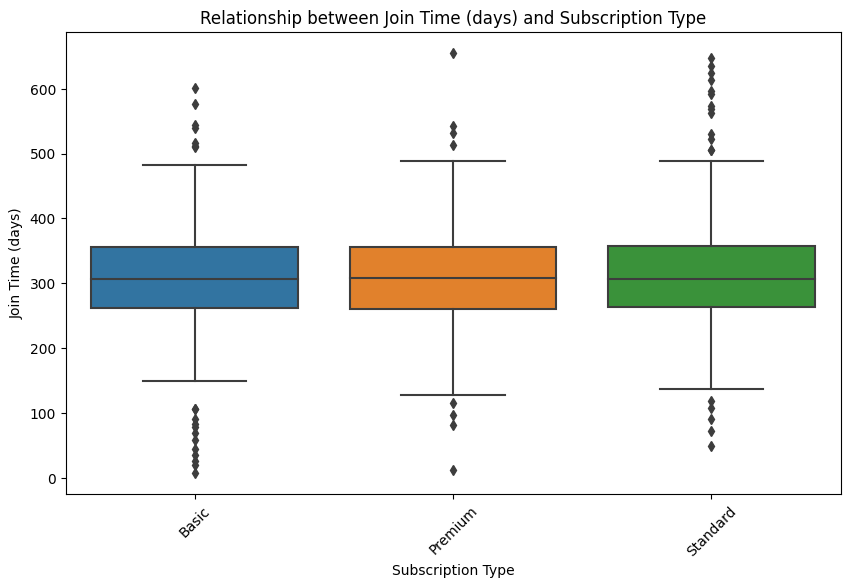

In [209]:
# relationship between the join time in days and the subscrition type 
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='subscription_type', y='join_time_days')
plt.title('Relationship between Join Time (days) and Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Join Time (days)')
plt.xticks(rotation=45)
plt.show()

In [210]:
subscription_counts

,device,subscription_type,count
0,Laptop,Basic,259
1,Laptop,Premium,192
2,Laptop,Standard,185
3,Smart TV,Basic,238
4,Smart TV,Premium,188
5,Smart TV,Standard,184
6,Smartphone,Basic,251
7,Smartphone,Premium,171
8,Smartphone,Standard,199
9,Tablet,Basic,251


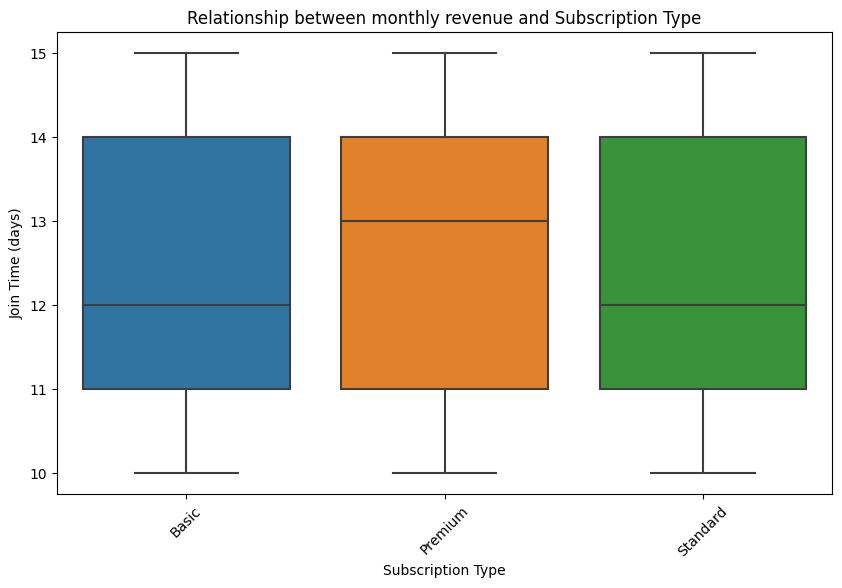

In [211]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='subscription_type', y='monthly_revenue')
plt.title('Relationship between monthly revenue and Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Join Time (days)')
plt.xticks(rotation=45)
plt.show()

In [212]:
devices = data.device.unique().tolist()
for d in devices:
    data[f'device_{d}'] = data.device.apply (lambda x : 1 if x == d else 0)

In [213]:
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,join_time_days,device_Smartphone,device_Tablet,device_Smart TV,device_Laptop
0,Basic,10,2022-01-15,2023-06-10,US,28,m,Smartphone,511,1,0,0,0
1,Premium,15,2021-09-05,2023-06-22,Canada,35,f,Tablet,655,0,1,0,0
2,Standard,12,2023-02-28,2023-06-27,UK,42,m,Smart TV,119,0,0,1,0
3,Standard,12,2022-07-10,2023-06-26,Australia,51,f,Laptop,351,0,0,0,1
4,Basic,10,2023-05-01,2023-06-28,Germany,33,m,Smartphone,58,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,2022-07-25,2023-07-12,Spain,28,f,Smart TV,352,0,0,1,0
2496,Basic,15,2022-08-04,2023-07-14,Spain,33,f,Smart TV,344,0,0,1,0
2497,Standard,12,2022-08-09,2023-07-15,US,38,m,Laptop,340,0,0,0,1
2498,Standard,13,2022-08-12,2023-07-12,Canada,48,f,Tablet,334,0,1,0,0


In [214]:
data.drop(columns = 'device', inplace = True)

In [215]:
data

,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,join_time_days,device_Smartphone,device_Tablet,device_Smart TV,device_Laptop
0,Basic,10,2022-01-15,2023-06-10,US,28,m,511,1,0,0,0
1,Premium,15,2021-09-05,2023-06-22,Canada,35,f,655,0,1,0,0
2,Standard,12,2023-02-28,2023-06-27,UK,42,m,119,0,0,1,0
3,Standard,12,2022-07-10,2023-06-26,Australia,51,f,351,0,0,0,1
4,Basic,10,2023-05-01,2023-06-28,Germany,33,m,58,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,2022-07-25,2023-07-12,Spain,28,f,352,0,0,1,0
2496,Basic,15,2022-08-04,2023-07-14,Spain,33,f,344,0,0,1,0
2497,Standard,12,2022-08-09,2023-07-15,US,38,m,340,0,0,0,1
2498,Standard,13,2022-08-12,2023-07-12,Canada,48,f,334,0,1,0,0
